In [26]:
deriv_Nt(nt, K, r) = r*nt*(1-nt/K)


deriv_Nt (generic function with 1 method)

In [27]:
next_Nt(nt, K, r, h) = nt + h*deriv_Nt(nt, K, r)

next_Nt (generic function with 1 method)

In [28]:
# 各種パラメータを定義
tmax = 10.0 # 終了時刻
r = 1.0 # パラメータ1
K = 10.0 #パラメータ2
N0 = 1.0 # 人口の初期値
numtimes  = 40 # 0 ≦ t < tmaxの分割数

h = tmax/numtimes

0.25

In [29]:
@code_warntype deriv_Nt(N0, K, r)

MethodInstance for deriv_Nt(::Float64, ::Float64, ::Float64)
  from deriv_Nt(nt, K, r) in Main at /Users/itoiyuuta/Desktop/jugyou/b/logistic/notebook/logistic.ipynb:1
Arguments
  #self#::Core.Const(deriv_Nt)
  nt::Float64
  K::Float64
  r::Float64
Body::Float64
1 ─ %1 = (nt / K)::Float64
│   %2 = (1 - %1)::Float64
│   %3 = (r * nt * %2)::Float64
└──      return %3



In [30]:
@code_warntype next_Nt(N0, K, r, h)

MethodInstance for next_Nt(::Float64, ::Float64, ::Float64, ::Float64)
  from next_Nt(nt, K, r, h) in Main at /Users/itoiyuuta/Desktop/jugyou/b/logistic/notebook/logistic.ipynb:1
Arguments
  #self#::Core.Const(next_Nt)
  nt::Float64
  K::Float64
  r::Float64
  h::Float64
Body::Float64
1 ─ %1 = Main.deriv_Nt(nt, K, r)::Float64
│   %2 = (h * %1)::Float64
│   %3 = (nt + %2)::Float64
└──      return %3



In [31]:
results = Vector{Float64}(undef, numtimes+1)

# 初期値
results[1] = N0

# 時間発展
for t in 1:numtimes
    results[t+1] = next_Nt(results[t], K, r, h)
end

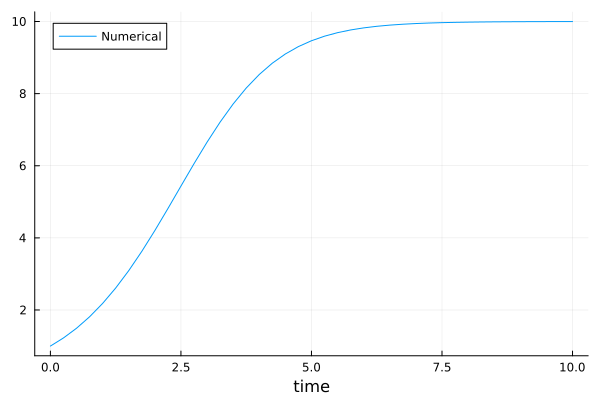

In [32]:
using Plots

times = LinRange(0, tmax, numtimes+1)

plot(times, results, label="Numerical", xlabel="time")

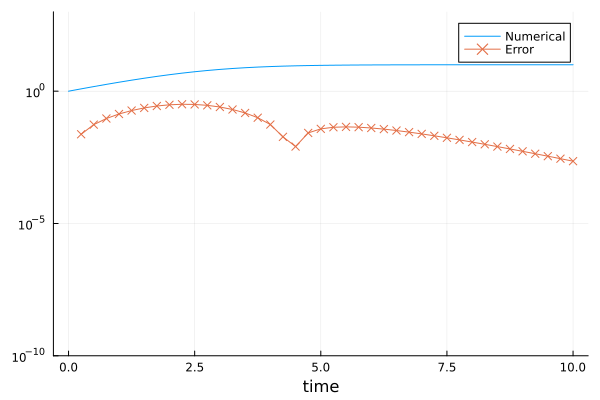

In [33]:
exact_Nt(time) = K/(1+(K-N0) / N0 * exp(-r*time))

p = plot(yaxis=:log, ylims=(1e-10, 1000),  xlabel="time")
plot!(p, times, results, label="Numerical")
plot!(p, times, abs.(results .- exact_Nt.(times)), marker=:x, label="Error")

In [34]:
using DifferentialEquations

# ロジスティック方程式の定義
function logistic!(du, u, params, t)
    r, K = params
    du[1] = r * u[1] * (1 - u[1]/K)
end

# パラメータの設定
params = (r, K)

# 初期条件の設定
u0 = [1.0]  # 開始時点の人口サイズ

# 時間範囲の設定
tspan = (0.0, tmax)

# 問題の設定
prob = ODEProblem(logistic!, u0, tspan, params)

# 微分方程式の解 (5次のルンゲクッタ法)
sol = solve(prob, Tsit5(), abstol=1e-7, reltol=1e-7)
;

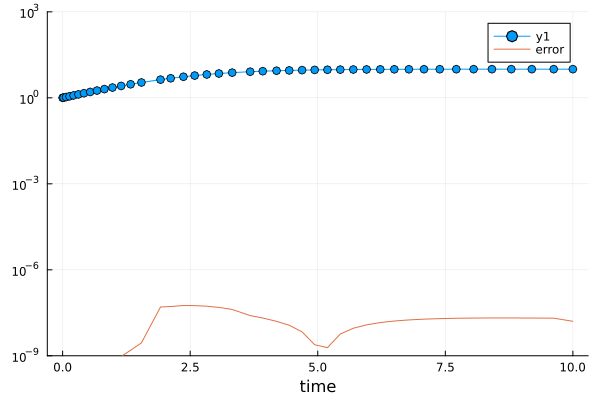

In [35]:
# 解のプロット

results_de = [u_[1] for u_ in sol.u]

p = plot(yaxis=:log, ylims=(1e-9, 1000),  xlabel="time")
plot!(p, sol.t, results_de, marker=:o)
plot!(p, sol.t, abs.(results_de .- exact_Nt.(sol.t)), label="error")